<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/Rainfall_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("/content/Rainfall.csv")

In [4]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [5]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [6]:
df.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [7]:
df.shape

(366, 12)

In [8]:


df.dropna(inplace = True)
df.shape
df.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


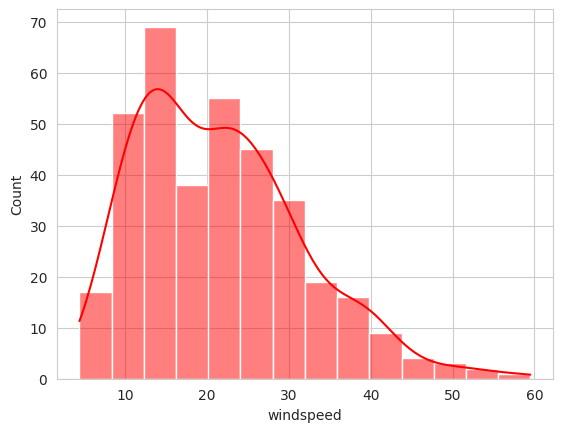

In [9]:
sns.set_style("whitegrid")
sns.histplot(df["windspeed"], kde=True, color="red")
plt.show()

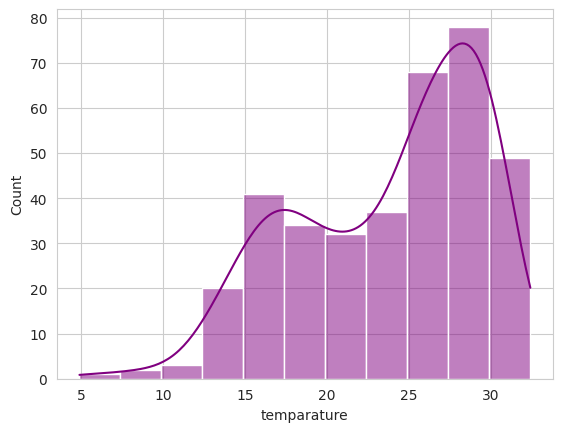

In [17]:
sns.histplot(df[" humidity"], kde=True, color="purple")
plt.show()

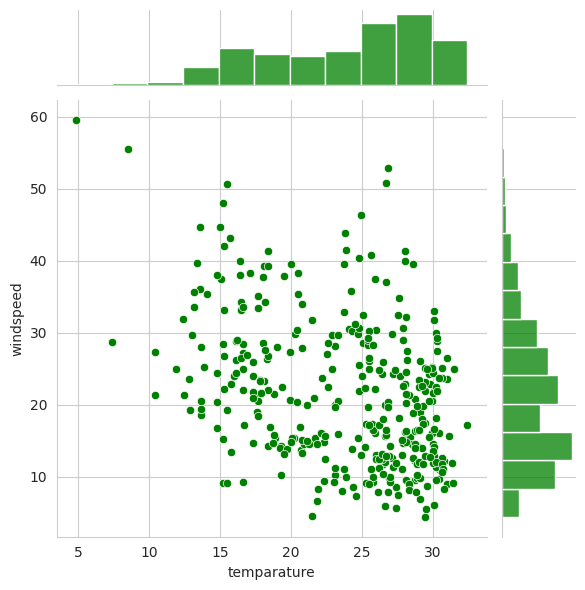

In [18]:
sns.jointplot(x="temparature", y="windspeed", data=df, color="green")
plt.show()

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [26]:
encoder=OneHotEncoder(sparse_output=False)
df["rainfall"]=encoder.fit_transform(df[["rainfall"]])

In [27]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,0.0,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,0.0,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,0.0,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,0.0,40.0,13.7


In [29]:
X=df.drop("rainfall", axis=1)
y= df["rainfall"]

In [30]:
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42, test_size=0.2)

In [32]:
LR=LogisticRegression()
LR.fit(X_train, y_train)


LogisticRegression()

In [33]:
y_pred=LR.predict(X_test)

In [34]:
residuals=y_test-y_pred

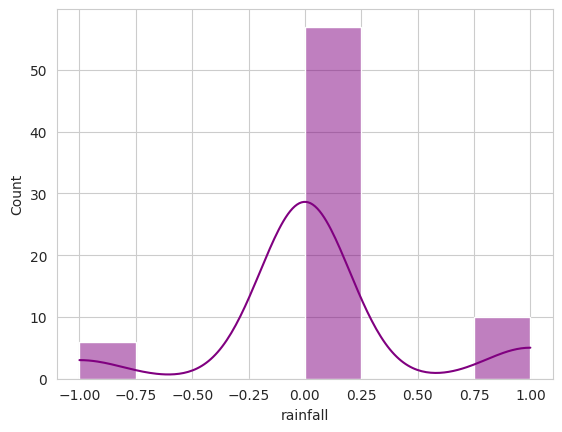

In [35]:
sns.histplot(residuals, kde=True, color="purple")
plt.show()

In [36]:
cm=confusion_matrix(y_test, y_pred)

In [37]:
cm

array([[49,  6],
       [10,  8]])

In [38]:
ar= accuracy_score(y_test, y_pred)
ar

0.7808219178082192